<a href="https://colab.research.google.com/github/as2c/MLP---Cosmology/blob/main/NN/NN_Keras_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code, our objective is to train some neural network models on our test data.

### Import required libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import timeit
import time
%alias_magic t timeit

plt.style.use('seaborn-talk')

from matplotlib import rcParams

# import warnings filter
from warnings import simplefilter 
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [146]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 18
plt.rc('figure', figsize=(10,6))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

# Import phase I data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Gadget 2 Data / with Neutrino

In [4]:
data = pd.read_csv(r'/content/drive/MyDrive/denc_Neutrino')
# data['in_halo'] = (data['haloID']>0).astype('int')
data['in_halo'] = (data['halo_mass']>1600).astype('int32')
data

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
0,10156552,755,2280.0,171.21194,220.56293,-274.228700,-0.084922,-0.052028,-0.042415,-0.028087,-0.024984,-0.018675,-0.016231,-0.011940,-0.010111,1
1,11068486,85,1539.0,-129.84116,92.60424,212.125500,-0.127820,-0.081099,-0.051217,-0.028345,-0.013751,-0.013991,-0.012344,-0.011500,-0.012220,0
2,9530036,654,1944.0,-290.99210,-885.49430,468.255040,-0.078978,-0.052806,-0.030027,-0.011704,0.001295,0.003803,0.005131,0.005231,0.003787,1
3,11455022,752,1394.0,-60.35258,422.43716,79.394300,-0.109989,-0.079155,-0.054663,-0.037685,-0.026670,-0.017901,-0.009227,-0.000868,0.001568,0
4,8591034,356,1649.0,403.66608,345.88077,9.231552,-0.084405,-0.019068,-0.009396,-0.001539,0.002288,0.005629,0.011288,0.013111,0.013433,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2160800,451,2634.0,654.82430,210.78130,255.344150,-0.094225,-0.076043,-0.060624,-0.040368,-0.020840,-0.016261,-0.011803,-0.005002,0.000918,1
99996,3257728,43,1112.0,-154.27774,488.65564,-779.558400,-0.127045,-0.076529,-0.056246,-0.038201,-0.027520,-0.016374,-0.008045,0.002627,0.006124,0
99997,6101605,484,1198.0,-113.51735,68.44336,275.964000,-0.122135,-0.091794,-0.063465,-0.032060,-0.017973,-0.016684,-0.017740,-0.017154,-0.012600,0
99998,4576456,44,1058.0,-130.21120,292.63483,-754.563000,-0.097585,-0.076140,-0.061788,-0.054584,-0.043055,-0.032415,-0.021591,-0.007463,0.004673,0


In [5]:
data.describe()

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.716004e+06,424.627710,2369.299450,35.207601,-13.728656,97.821939,-0.107338,-0.062074,-0.038666,-0.025951,-0.017900,-0.011968,-0.007224,-0.003341,-0.000224,0.557930
std,3.549230e+06,230.962533,1856.527585,364.820655,369.919751,373.578625,0.020301,0.020965,0.019921,0.018106,0.015956,0.013969,0.012346,0.011069,0.010084,0.496635
min,2.131444e+06,16.000000,241.000000,-1247.932500,-1462.806300,-1250.519700,-0.127820,-0.099572,-0.083351,-0.072824,-0.065316,-0.058751,-0.050519,-0.043771,-0.038371,0.000000
25%,5.953820e+06,238.000000,1194.000000,-226.284345,-254.656135,-145.829085,-0.124202,-0.077891,-0.052474,-0.038510,-0.028860,-0.021233,-0.015384,-0.010712,-0.006964,0.000000
50%,9.043250e+06,418.000000,1791.000000,32.857450,-4.815737,101.883413,-0.113607,-0.063404,-0.039434,-0.026100,-0.017784,-0.011980,-0.007369,-0.003743,-0.000713,1.000000
75%,1.176120e+07,619.000000,2945.000000,284.168098,238.543252,350.062135,-0.095776,-0.048722,-0.025370,-0.013587,-0.006677,-0.002087,0.001081,0.004249,0.006694,1.000000
max,1.464652e+07,870.000000,10101.000000,1314.092800,1256.822900,1355.984900,0.017155,0.032463,0.044346,0.040490,0.042179,0.036009,0.033482,0.034145,0.032602,1.000000


### Gadget 2 Data / without Neutrino

In [6]:
data_cdm = pd.read_csv(r'/content/drive/MyDrive/denc_CDM')
data_cdm['in_halo'] = (data_cdm['halo_mass']>1600).astype('int32')
data_cdm

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
0,8981131,414,1504.0,252.710050,-464.239500,509.94550,2.817576,2.780794,2.746420,2.446413,2.000415,1.533108,1.083378,0.691070,0.457584,0
1,9901676,1026,1013.0,-167.701370,499.161740,156.32635,2.690323,2.102417,1.805493,1.485764,1.267945,1.083753,0.849938,0.617267,0.431845,0
2,8288987,1079,727.0,46.129280,19.954561,164.61870,1.010590,0.821528,0.559744,0.220796,0.003400,-0.094805,-0.074599,0.003315,0.076079,0
3,4842631,675,1268.0,-234.629320,349.021400,-690.46674,1.889611,1.180236,0.495534,0.064434,-0.232441,-0.389582,-0.407908,-0.334146,-0.231578,0
4,12884124,437,6128.0,146.780670,-180.209270,-558.39777,2.676619,1.734870,0.906903,0.464721,0.187801,0.057663,0.029529,0.049055,0.101472,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12466311,1085,5542.0,25.253933,-580.586850,113.06337,1.482403,1.068278,0.857863,0.583947,0.327563,0.212553,0.139374,0.103515,0.090791,1
99996,11857185,491,691.0,-423.371550,138.109020,-300.80450,-0.209077,-0.534490,-0.724460,-0.749430,-0.743152,-0.663805,-0.511928,-0.347015,-0.253660,0
99997,9340191,947,868.0,225.385210,-9.085627,318.22006,1.086942,0.492283,0.114506,-0.050883,-0.161068,-0.168421,-0.159639,-0.175261,-0.202931,0
99998,13317963,1034,1175.0,-55.431606,16.332230,-898.90326,0.339088,-0.085185,-0.248881,-0.328230,-0.343797,-0.306353,-0.275684,-0.282089,-0.284524,0


## Define Datasets

In [7]:
## Neutrino
X = data.iloc[:,3:15].astype('float32').values
Y = data.in_halo.astype('int32').values

In [8]:
## CDM
X2 = data_cdm.iloc[:,3:15].astype('float32').values
Y2 = data_cdm.in_halo.astype('int32').values

In [9]:
## Scale / Neutrino
X = (X - np.mean(X))/np.std(X)

In [10]:
## Scale / CDM
X2 = (X2 - np.mean(X2))/np.std(X2)

In [11]:
## Split into test and train / Neutrino

tst_size = 0.2
ns, nf = np.shape(X) 
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X_train :',len(X_train),'   X_test :',len(X_test))

X_train : 80000    X_test : 20000


In [12]:
## Split into test and train / CDM

tst_size = 0.2
ns, nf = np.shape(X) 
X2_train, X2_test, Y2_train, Y2_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X2_train :',len(X2_train),'   X2_test :',len(X2_test))

X2_train : 80000    X2_test : 20000


# Keras Model / Binary

## Building the Model

In [118]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.losses import MeanSquaredError
from sklearn.metrics import classification_report


model = keras.Sequential()
model.add(layers.Dense(30,activation='relu', input_shape=(12, )))
# model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(100,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1),activation='tanh'))
model.add(layers.Dense(300,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1),activation='elu'))
model.add(layers.Dense(50,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1),activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))


model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-06), metrics=['Accuracy'])

## Keras on Neutrino

In [62]:
hist1 = model.fit(
    X_train,
    Y_train,
    batch_size= 500,
    epochs=20,
    verbose=1,
    validation_split=.1,
    shuffle=True,
)

Epoch 1/20
144/144 [==============================] - 2s 9ms/step - loss: 0.7209 - Accuracy: 0.5574 - val_loss: 0.6724 - val_Accuracy: 0.5820
Epoch 2/20
144/144 [==============================] - 1s 8ms/step - loss: 0.6708 - Accuracy: 0.5784 - val_loss: 0.6728 - val_Accuracy: 0.5704
Epoch 3/20
144/144 [==============================] - 1s 8ms/step - loss: 0.6674 - Accuracy: 0.5832 - val_loss: 0.6676 - val_Accuracy: 0.5829
Epoch 4/20
144/144 [==============================] - 1s 8ms/step - loss: 0.6657 - Accuracy: 0.5859 - val_loss: 0.6675 - val_Accuracy: 0.5796
Epoch 5/20
144/144 [==============================] - 1s 7ms/step - loss: 0.6647 - Accuracy: 0.5862 - val_loss: 0.6649 - val_Accuracy: 0.5918
Epoch 6/20
144/144 [==============================] - 1s 8ms/step - loss: 0.6646 - Accuracy: 0.5882 - val_loss: 0.6657 - val_Accuracy: 0.5913
Epoch 7/20
144/144 [==============================] - 1s 8ms/step - loss: 0.6634 - Accuracy: 0.5899 - val_loss: 0.6653 - val_Accuracy: 0.5909
Epoch 

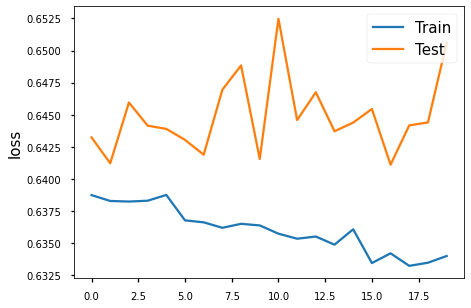

In [35]:
fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(1,1,1, ylabel= 'loss')
ax1.plot(hist1.history['loss'])
ax1.plot(hist1.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 30)                390       
                                                                 
 dense_20 (Dense)            (None, 100)               3100      
                                                                 
 dense_21 (Dense)            (None, 300)               30300     
                                                                 
 dense_22 (Dense)            (None, 50)                15050     
                                                                 
 dense_23 (Dense)            (None, 10)                510       
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 49,361
Trainable params: 49,361
Non-trai

### Cross-Validation

In [125]:
def model_fn():
    from tensorflow import keras
    from tensorflow.keras import layers
    from keras.losses import MeanSquaredError
    from sklearn.metrics import classification_report


    model = keras.Sequential()
    model.add(layers.Dense(30,activation='relu', input_shape=(12, )))
    # model.add(layers.Dense(10,activation='relu'))
    model.add(layers.Dense(100,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1),activation='tanh'))
    model.add(layers.Dense(100,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1),activation='elu'))
    model.add(keras.layers.Dense(1,activation='sigmoid'))


    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-06), metrics=['Accuracy'])
    # model.build()
    return model

In [126]:
epch = 25
batch_sz = 800

from sklearn.model_selection import KFold
n_folds = 3
kf = KFold(n_splits=n_folds, shuffle=True)


loss = []
acc = []
val_loss = []
val_acc = []

# cross validate:
for train_index, val_index in kf.split(X):
    model = model_fn()
    hists = model.fit(X[train_index], Y[train_index],
                     epochs=epch,
                     batch_size=500,
                     validation_data = (X[val_index], Y[val_index]),
                     verbose=0)
    loss.append(hists.history['loss'])
    acc.append(hists.history['Accuracy'])
    val_loss.append([hists.history['val_loss']])
    val_acc.append(hists.history['val_Accuracy'])
    
loss = np.array(loss).reshape(n_folds, epch )    
acc = np.array(acc).reshape(n_folds, epch )       
val_loss = np.array(val_loss).reshape(n_folds, epch )      
val_acc  = np.array(val_acc).reshape(n_folds, epch )       

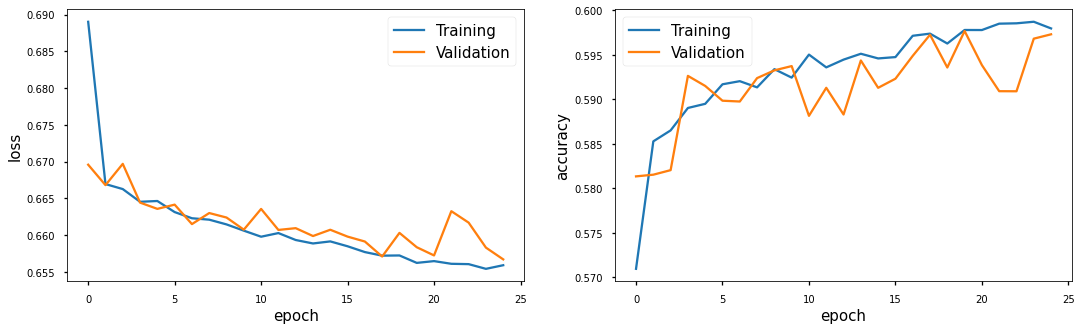

In [70]:
loss_m = loss.mean(axis=0)
loss_s = loss.var(axis=0)
acc_m = acc.mean(axis=0)
acc_s = acc.var(axis=0)

val_loss_m = val_loss.mean(axis=0)
val_loss_s = val_loss.var(axis=0)
val_acc_m = val_acc.mean(axis=0)
val_acc_s = val_acc.var(axis=0)

plt.figure(figsize=(18,5))

ax1 = plt.subplot(1,2,1, ylabel='loss', xlabel='epoch')
ax1.plot(loss_m, label = 'Training')
ax1.fill_between(range(len(loss_m)),loss_m-loss_s/2, loss_m+loss_s/2,color="darkblue", lw=2)
ax1.plot(val_loss_m, label = 'Validation')
ax1.fill_between(range(len(loss_m)),val_loss_m-loss_s/2, val_loss_m+loss_s/2,color="darkgreen", lw=2)
plt.legend(loc=0)

ax2 = plt.subplot(1,2,2, ylabel='accuracy', xlabel='epoch')
ax2.plot(acc_m, label = 'Training')
ax2.fill_between(range(len(acc_m)),acc_m-acc_s/2, acc_m+acc_s/2,color="darkblue", lw=2)
ax2.plot(val_acc_m, label = 'Validation')
ax2.fill_between(range(len(acc_m)),val_acc_m-acc_s/2, val_acc_m+acc_s/2,color="darkgreen", lw=2)

plt.legend(loc=0)
plt.show()



### Tune HP

#### GridSearch

In [89]:
def model_fn(dense_layer_sizes, regularizations, lr=.1): #dropouts
    model = keras.Sequential() 
    
    # model.add( keras.layers.Flatten(input_shape=(12, )) )
    
    for i in range( len(dense_layer_sizes )):
        model.add( keras.layers.Dense( dense_layer_sizes[i], 
                                      activation='relu', 
                                      kernel_regularizer=keras.regularizers.l2(regularizations) 
                                     ) )
    model.add(keras.layers.Dense(dense_layer_sizes[i], 
                            activation='tanh', 
                            kernel_regularizer=keras.regularizers.l2(regularizations)))
        # model.add(keras.layers.Dropout( dropouts ) )
        
       
    model.add(keras.layers.Dense(1,activation='sigmoid'))
        
    model.compile(loss=keras.losses.BinaryCrossentropy(), 
                  optimizer=keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-06), 
                  metrics=['accuracy'])
    

    return model

mdl = model_fn([30,20,20], .001, .01) #.001
# mdl = model_fn([128], [.01], [.01])
# mdl.summary()

In [90]:
btch_size = 500
epch = 8
history = mdl.fit(X_train, Y_train, batch_size=btch_size, epochs=epch )

Epoch 1/8
160/160 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5708
Epoch 2/8
160/160 [==============================] - 1s 3ms/step - loss: 0.6746 - accuracy: 0.5784
Epoch 3/8
160/160 [==============================] - 1s 3ms/step - loss: 0.6735 - accuracy: 0.5777
Epoch 4/8
160/160 [==============================] - 1s 3ms/step - loss: 0.6727 - accuracy: 0.5785
Epoch 5/8
160/160 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5777
Epoch 6/8
160/160 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5796
Epoch 7/8
160/160 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5801
Epoch 8/8
160/160 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.5803


In [91]:
# Grid search over these:
dense_size_candidates = [[40,30,30], [30,10] , [30,10,10] ] # the lists contain the number of nodes for each layer
regularizations_candidates = [ (.01), (.001) ]
# dropouts_candidates = [  (.005), (.01), (.003) ]
lr_candidates = [.1, .01, .001]
# epch_list = [4, 10]
batch_size_candidates = [500,300]

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

gs_classifier = KerasClassifier(model_fn)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  if sys.path[0] == '':


In [92]:
validator = GridSearchCV(gs_classifier,
                         param_grid={'dense_layer_sizes': dense_size_candidates,
                                     # epochs is avail for tuning even when not
                                     # an argument to model building function
                                     'epochs': [3],
                                     'regularizations': regularizations_candidates,
                                    #  'dropouts': dropouts_candidates,
                                     'lr': lr_candidates},
                         scoring='accuracy',
                         n_jobs= 1,  )
validator.fit(X2_train, Y2_train)

Epoch 1/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7008 - accuracy: 0.5427
Epoch 2/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6963 - accuracy: 0.5386
Epoch 3/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6948 - accuracy: 0.5376
Epoch 1/3
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6981 - accuracy: 0.5429
Epoch 2/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6929 - accuracy: 0.5433
Epoch 3/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6973 - accuracy: 0.5351
Epoch 1/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6992 - accuracy: 0.5411
Epoch 2/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6930 - accuracy: 0.5430
Epoch 3/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6922 - accuracy: 0.5448
Epoch 1/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6974 - accurac

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f57d68e5c50>,
             n_jobs=1,
             param_grid={'dense_layer_sizes': [[40, 30, 30], [30, 10],
                                               [30, 10, 10]],
                         'epochs': [3], 'lr': [0.1, 0.01, 0.001],
                         'regularizations': [0.01, 0.001]},
             scoring='accuracy')

In [93]:
print('The parameters of the best model are: ')
print(validator.best_params_)

# validator.best_estimator_ returns sklearn-wrapped version of best model.
# validator.best_estimator_.model returns the (unwrapped) keras model
best_model = validator.best_estimator_

The parameters of the best model are: 
{'dense_layer_sizes': [30, 10], 'epochs': 3, 'lr': 0.001, 'regularizations': 0.001}


In [94]:
epch = 1000
hist = best_model.fit(X_test, Y_test, batch_size=500, epochs=epch , verbose=0)

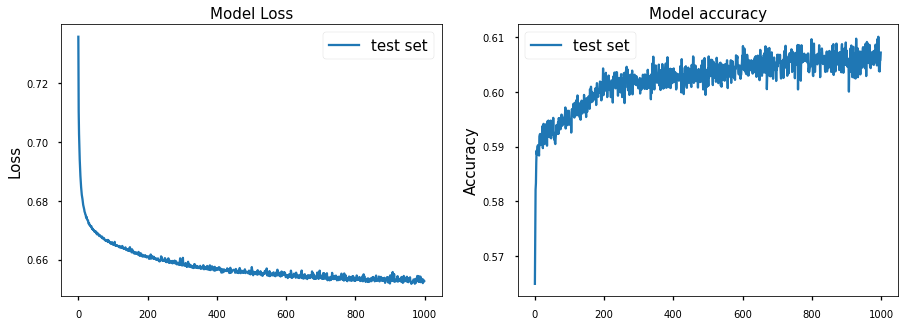

In [95]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1, title='Model Loss', ylabel= 'Loss')
ax1.plot(hist.history['loss'], label='test set')
plt.legend(loc=0)

ax2 = fig.add_subplot(1,2,2, title = 'Model accuracy', ylabel= 'Accuracy')
ax2.plot(hist.history['accuracy'], label='test set')
plt.legend(loc=0)
plt.show()

In [96]:
val_acc_per_epoch = hist.history['accuracy']
best_CDM_1 = max(val_acc_per_epoch)
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))
print('Best accuracy: %f' %(best_CDM_1,))

Best epoch: 993
Best accuracy: 0.610100


#### Keras tuner

In [97]:
!pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 98 kB 5.0 MB/s 


In [99]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(12, )))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=12, max_value=40, step=2)
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='relu', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='tanh', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(5))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 2e-2])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

  return model

In [102]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     project_name='kt1')

In [100]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [103]:
tuner.search(X_train, Y_train, 
             epochs=50, 
             batch_size = 100, 
             validation_split=0.2, 
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 15s]
val_accuracy: 0.3970625102519989

Best val_accuracy So Far: 0.5528749823570251
Total elapsed time: 00h 04m 23s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 20 and the optimal learning rate for the optimizer
is 0.02.



### Best Model

In [116]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_tuner = tuner.hypermodel.build(best_hps)
history_tuner = model_tuner.fit(X_train, Y_train, 
                    epochs=30, 
                    batch_size = 400, 
                    validation_data=(X_test, Y_test))

val_acc_per_epoch = history_tuner.history['val_accuracy']
best_n = max(val_acc_per_epoch)
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/30
200/200 [==============================] - 1s 3ms/step - loss: 1.2641 - accuracy: 0.1790 - val_loss: 0.6991 - val_accuracy: 0.1743
Epoch 2/30
200/200 [==============================] - 1s 3ms/step - loss: 0.6892 - accuracy: 0.1645 - val_loss: 0.6849 - val_accuracy: 0.2357
Epoch 3/30
200/200 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.1703 - val_loss: 0.6844 - val_accuracy: 0.4426
Epoch 4/30
200/200 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.1888 - val_loss: 0.6835 - val_accuracy: 0.0765
Epoch 5/30
200/200 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.1610 - val_loss: 0.6826 - val_accuracy: 0.1480
Epoch 6/30
200/200 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.1616 - val_loss: 0.6823 - val_accuracy: 0.1178
Epoch 7/30
200/200 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.1614 - val_loss: 0.6823 - val_accuracy: 0.1053
Epoch 

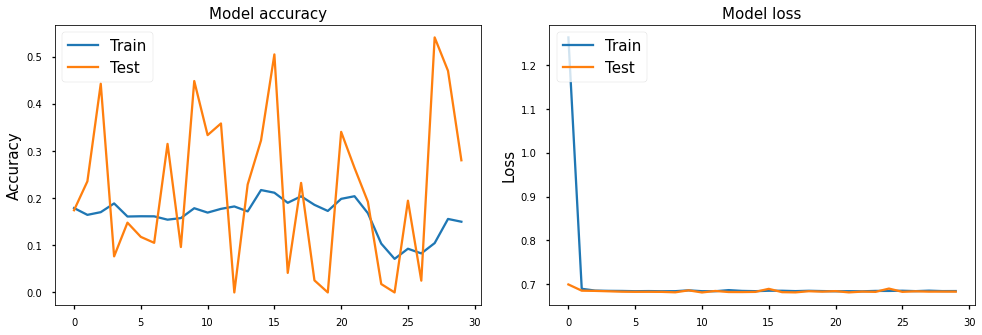

In [117]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history_tuner.history['accuracy'])
plt.plot(history_tuner.history['val_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history_tuner.history['loss'])
plt.plot(history_tuner.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

Keras Tuner did worse.

### Classification Report

Save matrices, show at the end of the file.

In [112]:
from sklearn.metrics import classification_report
clf_report_n = classification_report(Y_test, best_model.predict(X_test))

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm_n = confusion_matrix(Y_test, best_model.predict(X_test))

## Keras on CDM

In [123]:
hist2 = model.fit(
    X2_train,
    Y2_train,
    batch_size= 400,
    epochs=50,
    verbose=0,
    validation_split=.2,
    shuffle=True,
)

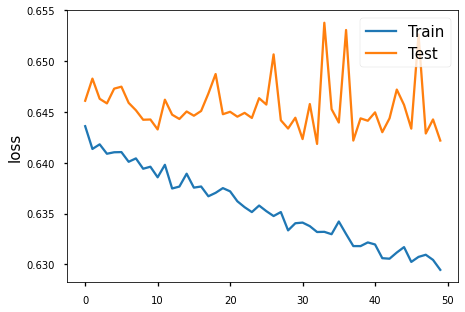

In [124]:
fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(1,1,1, ylabel= 'loss')
ax1.plot(hist2.history['loss'])
ax1.plot(hist2.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Cross-Validation

In [127]:
def model_fn():
    from tensorflow import keras
    from tensorflow.keras import layers
    from keras.losses import MeanSquaredError
    from sklearn.metrics import classification_report


    model = keras.Sequential()
    model.add(layers.Dense(30,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1),activation='relu'))
    model.add(layers.Dense(10,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1), input_shape=(12,),activation='tanh'))
    model.add(keras.layers.Dense(5))
    
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-06), metrics=['accuracy'])
    return model

In [131]:
epch = 10
batch_sz = 500

from sklearn.model_selection import KFold
n_folds = 3
kf = KFold(n_splits=n_folds, shuffle=True)


loss = []
acc = []
val_loss = []
val_acc = []

# cross validate:
for train_index, val_index in kf.split(X2):
    model = model_fn()
    hists = model.fit(X2[train_index], Y2[train_index],
                     epochs=epch,
                     batch_size=500,
                     validation_data = (X2[val_index], Y2[val_index]),
                     verbose=0)
    # print(hist.history.keys)
    loss.append(hists.history['loss'])
    acc.append(hists.history['accuracy'])
    val_loss.append([hists.history['val_loss']])
    val_acc.append(hists.history['val_accuracy'])
    
loss = np.array(loss).reshape(n_folds, epch )    
acc = np.array(acc).reshape(n_folds, epch )       
val_loss = np.array(val_loss).reshape(n_folds, epch )      
val_acc  = np.array(val_acc).reshape(n_folds, epch )       

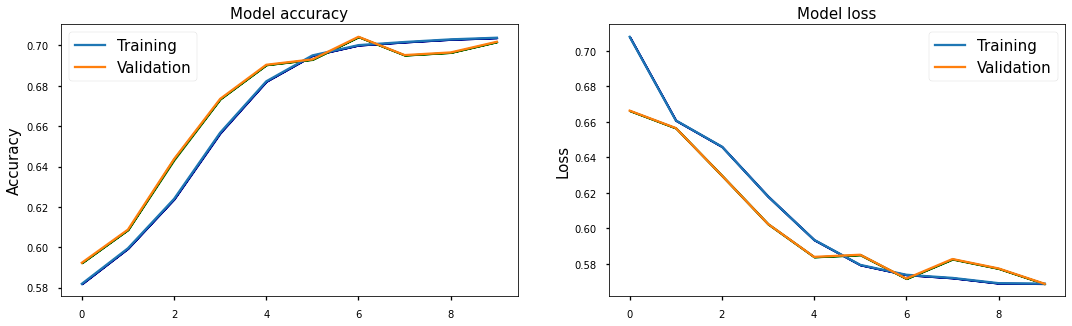

In [154]:
loss_m = loss.mean(axis=0)
loss_s = loss.var(axis=0)
acc_m = acc.mean(axis=0)
acc_s= acc.var(axis=0)

val_loss_m = val_loss.mean(axis=0)
val_loss_s = val_loss.var(axis=0)
val_acc_m = val_acc.mean(axis=0)
val_acc_s= val_acc.var(axis=0)

fig = plt.figure(figsize=(18,5))

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(loss_m, label = 'Training')
plt.fill_between(range(len(loss_m)),loss_m-loss_s/2, loss_m+loss_s/2,color="darkblue", lw=2)
plt.plot(val_loss_m, label = 'Validation')
plt.fill_between(range(len(loss_m)),val_loss_m-val_loss_s/2, val_loss_m+val_loss_s/2,color="darkgreen", lw=2)
plt.legend(loc=0)

# Plot training & validation accuracy values
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(acc_m, label = 'Training')
plt.fill_between(range(len(acc_m)),acc_m-acc_s/2, acc_m+acc_s/2,color="darkblue", lw=2)
plt.plot(val_acc_m, label = 'Validation')
plt.fill_between(range(len(acc_m)),val_acc_m-val_acc_s/2, val_acc_m+val_acc_s/2,color="darkgreen", lw=2)
plt.legend(loc=0)
plt.show()

### Tuning HP

#### GridSearch

In [168]:
def model_fn(dense_layer_sizes, regularizations, lr=.1): #dropouts
    model = keras.Sequential() 
    
    # model.add( keras.layers.Flatten(input_shape=(12, )) )
    
    for i in range( len(dense_layer_sizes )):
        model.add( keras.layers.Dense( dense_layer_sizes[i], 
                                      activation='relu', 
                                      kernel_regularizer=keras.regularizers.l2(regularizations) 
                                     ) )
    model.add(keras.layers.Dense(dense_layer_sizes[i], 
                            activation='tanh', 
                            kernel_regularizer=keras.regularizers.l2(regularizations)))
        # model.add(keras.layers.Dropout( dropouts ) )
        
       
    model.add(keras.layers.Dense(1,activation='sigmoid'))
        
    model.compile(loss=keras.losses.BinaryCrossentropy(), 
                  optimizer=keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-06), 
                  metrics=['accuracy'])
    

    return model

mdl = model_fn([50,20,20], .001, .1) #.001
# mdl = model_fn([128], [.01], [.01])
# mdl.summary()

In [169]:
btch_size = 500
epch = 8
history = mdl.fit(X2_train, Y2_train, batch_size=btch_size, epochs=epch )

Epoch 1/8
160/160 [==============================] - 2s 5ms/step - loss: 0.7099 - accuracy: 0.5536
Epoch 2/8
160/160 [==============================] - 1s 7ms/step - loss: 0.6816 - accuracy: 0.5612
Epoch 3/8
160/160 [==============================] - 1s 3ms/step - loss: 0.6819 - accuracy: 0.5579
Epoch 4/8
160/160 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5569
Epoch 5/8
160/160 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5572
Epoch 6/8
160/160 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5608
Epoch 7/8
160/160 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5609
Epoch 8/8
160/160 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5605


In [167]:
# Grid search over these:
dense_size_candidates = [[40,30,30], [30,10] , [30,10,10] ] # the lists contain the number of nodes for each layer
regularizations_candidates = [ (.01), (.001) ]
# dropouts_candidates = [  (.005), (.01), (.003) ]
lr_candidates = [.1, .01, .001]
# epch_list = [4, 10]
batch_size_candidates = [500,300]

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

gs_classifier = KerasClassifier(model_fn)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  if sys.path[0] == '':


In [ ]:
validator = GridSearchCV(gs_classifier,
                         param_grid={'dense_layer_sizes': dense_size_candidates,
                                     # epochs is avail for tuning even when not
                                     # an argument to model building function
                                     'epochs': [3],
                                     'regularizations': regularizations_candidates,
                                    #  'dropouts': dropouts_candidates,
                                     'lr': lr_candidates},
                         scoring='accuracy',
                         n_jobs= 1,  )
validator.fit(X2_train, Y2_train)

Epoch 1/3
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6970 - accuracy: 0.5423
Epoch 2/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6966 - accuracy: 0.5372
Epoch 3/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6916 - accuracy: 0.5437
Epoch 1/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6989 - accuracy: 0.5458
Epoch 2/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6954 - accuracy: 0.5392
Epoch 3/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6936 - accuracy: 0.5415
Epoch 1/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6980 - accuracy: 0.5428
Epoch 2/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6960 - accuracy: 0.5441
Epoch 3/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6915 - accuracy: 0.5467
Epoch 1/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6976 - accurac

In [147]:
print('The parameters of the best model are: ')
print(validator.best_params_)

# validator.best_estimator_ returns sklearn-wrapped version of best model.
# validator.best_estimator_.model returns the (unwrapped) keras model
best_model = validator.best_estimator_

The parameters of the best model are: 
{'dense_layer_sizes': [40, 30, 30], 'epochs': 3, 'lr': 0.1, 'regularizations': 0.01}


In [148]:
epch = 1000
hist = best_model.fit(X2_test, Y2_test, batch_size=500, epochs=epch , verbose=0)

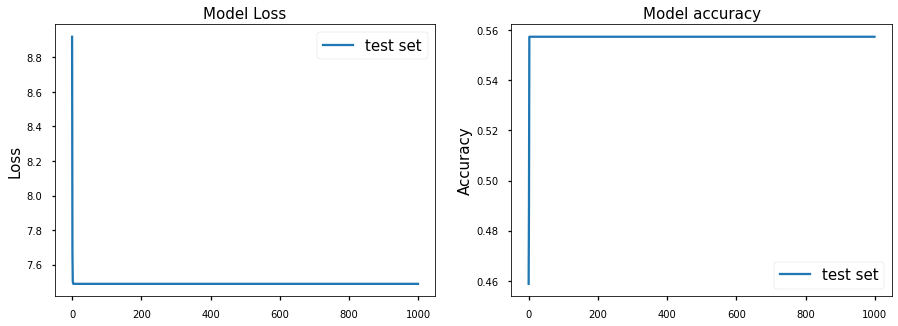

In [149]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1, title='Model Loss', ylabel= 'Loss')
ax1.plot(hist.history['loss'], label='test set')
plt.legend(loc=0)

ax2 = fig.add_subplot(1,2,2, title = 'Model accuracy', ylabel= 'Accuracy')
ax2.plot(hist.history['accuracy'], label='test set')
plt.legend(loc=0)
plt.show()

In [150]:
val_acc_per_epoch = hist.history['accuracy']
best_CDM_1 = max(val_acc_per_epoch)
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))
print('Best accuracy: %f' %(best_CDM_1,))

Best epoch: 3
Best accuracy: 0.557400


####KerasTuner

In [155]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(12, )))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=12, max_value=40, step=2)
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='relu', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='tanh', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(1,activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 2e-2])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

  return model

In [156]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     project_name='kt2')

In [157]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [158]:
tuner.search(X2_train, Y2_train, 
             epochs=50, 
             batch_size = 100, 
             validation_split=0.2, 
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 24s]
val_accuracy: 0.5528749823570251

Best val_accuracy So Far: 0.5715625286102295
Total elapsed time: 00h 03m 55s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 18 and the optimal learning rate for the optimizer
is 0.0001.



### Best Model

In [159]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_tuner = tuner.hypermodel.build(best_hps)
history = model_tuner.fit(X2_train, Y2_train, 
                    epochs=30, 
                    batch_size = 100, 
                    validation_data=(X2_test, Y2_test))

val_acc_per_epoch = history.history['val_accuracy']
best_CDM = max(val_acc_per_epoch)
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/30
800/800 [==============================] - 5s 4ms/step - loss: 1.8607 - accuracy: 0.4953 - val_loss: 1.5476 - val_accuracy: 0.5293
Epoch 2/30
800/800 [==============================] - 3s 4ms/step - loss: 1.3300 - accuracy: 0.5433 - val_loss: 1.1467 - val_accuracy: 0.5490
Epoch 3/30
800/800 [==============================] - 3s 3ms/step - loss: 1.0197 - accuracy: 0.5525 - val_loss: 0.9138 - val_accuracy: 0.5543
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 0.8437 - accuracy: 0.5553 - val_loss: 0.7866 - val_accuracy: 0.5569
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 0.7514 - accuracy: 0.5576 - val_loss: 0.7238 - val_accuracy: 0.5574
Epoch 6/30
800/800 [==============================] - 1s 2ms/step - loss: 0.7086 - accuracy: 0.5581 - val_loss: 0.6973 - val_accuracy: 0.5574
Epoch 7/30
800/800 [==============================] - 2s 2ms/step - loss: 0.6921 - accuracy: 0.5581 - val_loss: 0.6885 - val_accuracy: 0.5574
Epoch 

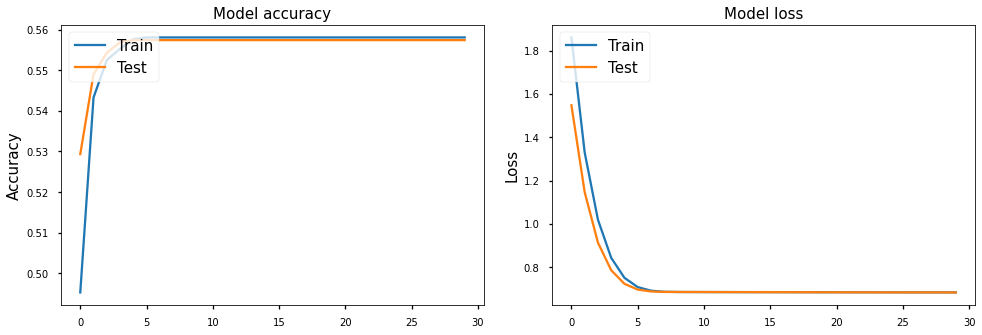

In [160]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

### Classification Report

In [162]:
from sklearn.metrics import classification_report
clf_report_CDM = classification_report(Y2_test, best_model.predict(X2_test))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm_CDM = confusion_matrix(Y2_test, best_model.predict(X2_test))

## Compare Results

Best Accuracy on Neutrino: 0.5407999753952026
              precision    recall  f1-score   support

           0       0.56      0.49      0.53      8852
           1       0.63      0.70      0.66     11148

    accuracy                           0.61     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.61      0.60     20000

--------------------
Best Accuracy on CDM: 0.5573999881744385
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8852
           1       0.56      1.00      0.72     11148

    accuracy                           0.56     20000
   macro avg       0.28      0.50      0.36     20000
weighted avg       0.31      0.56      0.40     20000



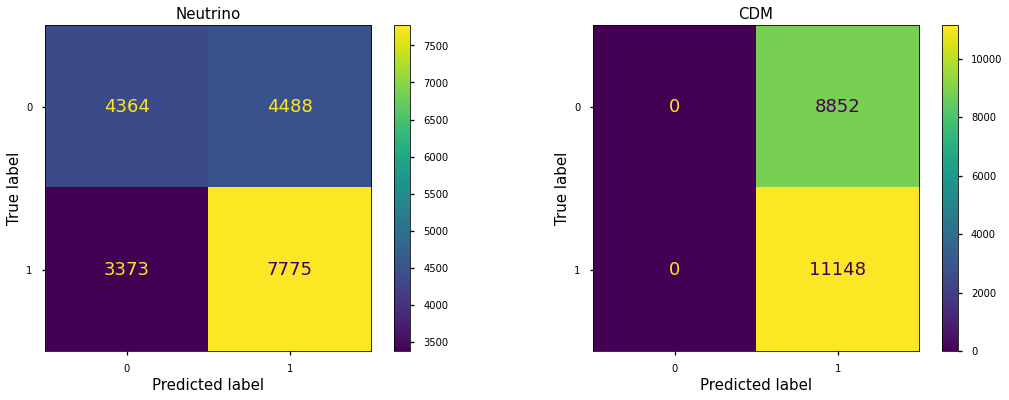

In [164]:
print(f'Best Accuracy on Neutrino: {best_n}')
print(clf_report_n)
print('-'*20)

print(f'Best Accuracy on CDM: {best_CDM}')
print(clf_report_CDM)

fig = plt.figure(figsize=(18,6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_n)
ax1 = fig.add_subplot(1,2,1, title='Neutrino')
disp1.plot(ax=ax1)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_CDM)
ax2 = fig.add_subplot(1,2,2, title='CDM')
disp2.plot(ax=ax2)
plt.show()